In [3]:
import pandas as pd   # For data manipulation
import numpy as np    # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations

# Optional: Configure settings for better visualization
sns.set_style("darkgrid")


In [15]:
df = pd.read_csv("netflix_users.csv")
print(df.head())


   User_ID            Name  Age Country Subscription_Type  Watch_Time_Hours  \
0        1  James Martinez   18  France           Premium             80.26   
1        2     John Miller   23     USA           Premium            321.75   
2        3      Emma Davis   60      UK             Basic             35.89   
3        4     Emma Miller   44     USA           Premium            261.56   
4        5      Jane Smith   68     USA          Standard            909.30   

  Favorite_Genre  Last_Login  
0          Drama  2024-05-12  
1         Sci-Fi  2025-02-05  
2         Comedy  2025-01-24  
3    Documentary  2024-03-25  
4          Drama  2025-01-14  


In [17]:
# Checking for missing values
print(df.isnull().sum())


User_ID              0
Name                 0
Age                  0
Country              0
Subscription_Type    0
Watch_Time_Hours     0
Favorite_Genre       0
Last_Login           0
dtype: int64


In [19]:
# Cal percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


User_ID              0.0
Name                 0.0
Age                  0.0
Country              0.0
Subscription_Type    0.0
Watch_Time_Hours     0.0
Favorite_Genre       0.0
Last_Login           0.0
dtype: float64


In [27]:
print(df.columns)  # Displays all column names



Index(['User_ID', 'Name', 'Age', 'Country', 'Subscription_Type',
       'Watch_Time_Hours', 'Favorite_Genre', 'Last_Login'],
      dtype='object')


In [31]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)  # Check updated column names


Index(['user_id', 'name', 'age', 'country', 'subscription_type',
       'watch_time_hours', 'favorite_genre', 'last_login'],
      dtype='object')


In [37]:
df = df.drop(columns=["watch_time"], errors="ignore")  # Won’t give an error if the column is missing

In [39]:
print(df.isnull().sum())  # Check missing values


user_id              0
name                 0
age                  0
country              0
subscription_type    0
watch_time_hours     0
favorite_genre       0
last_login           0
dtype: int64


In [41]:
print(df.duplicated().sum())  # Count the number of duplicate rows

0


In [43]:
df = df.drop_duplicates()


In [45]:
print(df.duplicated().sum())  # Should print 0 if all duplicates are removed


0


In [47]:
df.describe()


,user_id,age,watch_time_hours
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,46.482880,500.468858
std,7217.022701,19.594861,286.381815
min,1.000000,13.000000,0.120000
25%,6250.750000,29.000000,256.567500
50%,12500.500000,46.000000,501.505000
75%,18750.250000,63.000000,745.732500
max,25000.000000,80.000000,999.990000


In [55]:
print(df.columns)


Index(['user_id', 'name', 'age', 'country', 'subscription_type',
       'watch_time_hours', 'favorite_genre', 'last_login'],
      dtype='object')


In [57]:
df.columns = df.columns.str.strip()  # Remove any leading or trailing spaces


In [59]:
if 'watch_time' in df.columns:
    print(df['watch_time'].head())
else:
    print("Column 'watch_time' not found")


Column 'watch_time' not found


In [61]:
[col for col in df.columns if 'watch' in col.lower()]


['watch_time_hours']

In [71]:
print(df.columns)


Index(['user_id', 'name', 'age', 'country', 'subscription_type',
       'watch_time_hours', 'favorite_genre', 'last_login'],
      dtype='object')


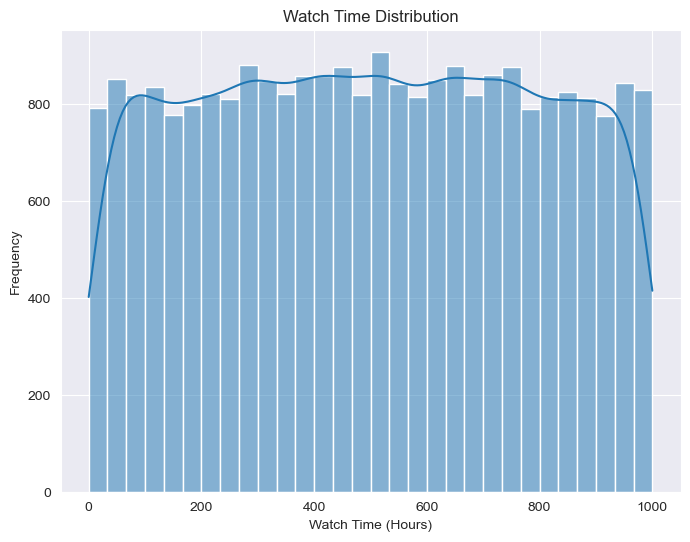

In [79]:
plt.figure(figsize=(8, 6))
sns.histplot(df['watch_time_hours'], bins=30, kde=True)
plt.title('Watch Time Distribution')
plt.xlabel('Watch Time (Hours)')
plt.ylabel('Frequency')
plt.show()


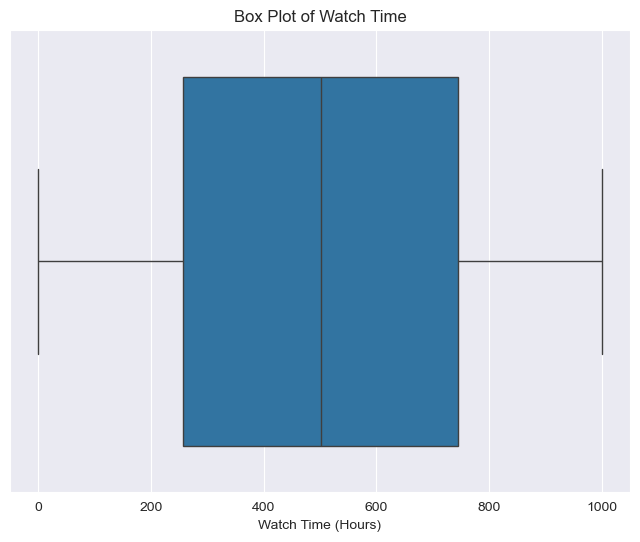

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['watch_time_hours'])
plt.title('Box Plot of Watch Time')
plt.xlabel('Watch Time (Hours)')
plt.show()


In [85]:
df['watch_time_hours'].describe()


count    25000.000000
mean       500.468858
std        286.381815
min          0.120000
25%        256.567500
50%        501.505000
75%        745.732500
max        999.990000
Name: watch_time_hours, dtype: float64

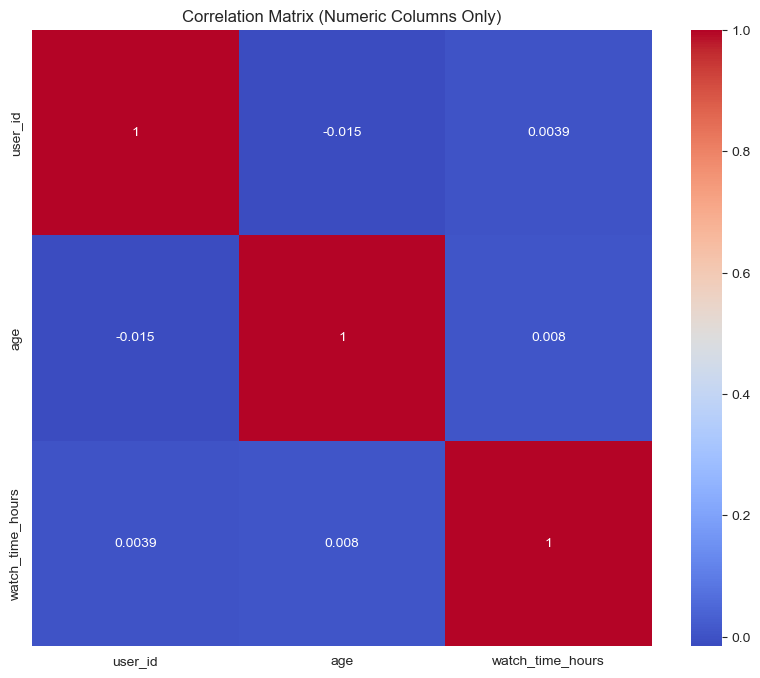

In [89]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()


In [93]:
print(df.columns)


Index(['user_id', 'name', 'age', 'country', 'subscription_type',
       'watch_time_hours', 'favorite_genre', 'last_login'],
      dtype='object')


In [95]:
date_col = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
print(date_col)


['watch_time_hours']


In [103]:
import pandas as pd

# Load the data
df = pd.read_csv('netflix_users.csv')

# Display column names
print("Column Names:", df.columns)

# Show the first few rows to inspect the data
df.head()


Column Names: Index(['User_ID', 'Name', 'Age', 'Country', 'Subscription_Type',
       'Watch_Time_Hours', 'Favorite_Genre', 'Last_Login'],
      dtype='object')


,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14


In [105]:
# Convert Last_Login to datetime
df['Last_Login'] = pd.to_datetime(df['Last_Login'])

# Check if conversion was successful
print(df['Last_Login'].head())


0   2024-05-12
1   2025-02-05
2   2025-01-24
3   2024-03-25
4   2025-01-14
Name: Last_Login, dtype: datetime64[ns]


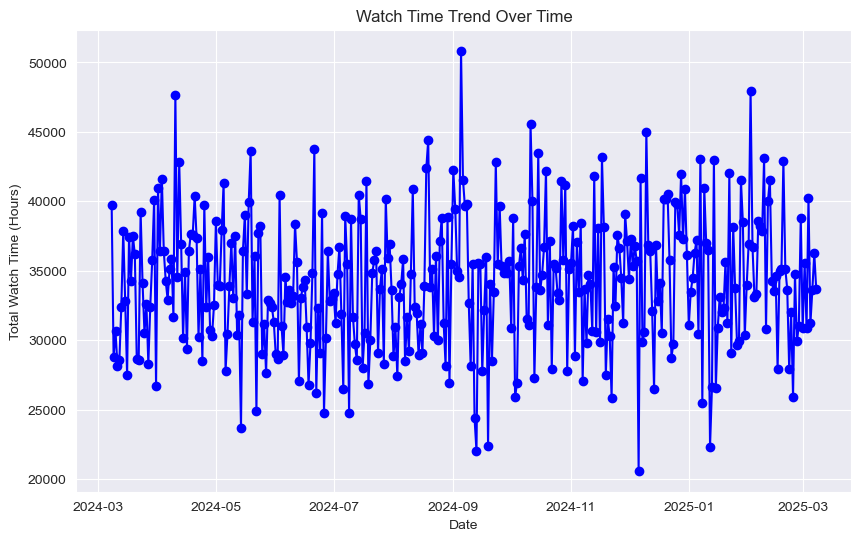

In [107]:
# Group by date and sum the watch time
watch_time_trend = df.groupby(df['Last_Login'].dt.date)['Watch_Time_Hours'].sum()

# Plotting the watch time trend
plt.figure(figsize=(10, 6))
watch_time_trend.plot(kind='line', marker='o', color='blue')
plt.title('Watch Time Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Watch Time (Hours)')
plt.grid(True)
plt.show()


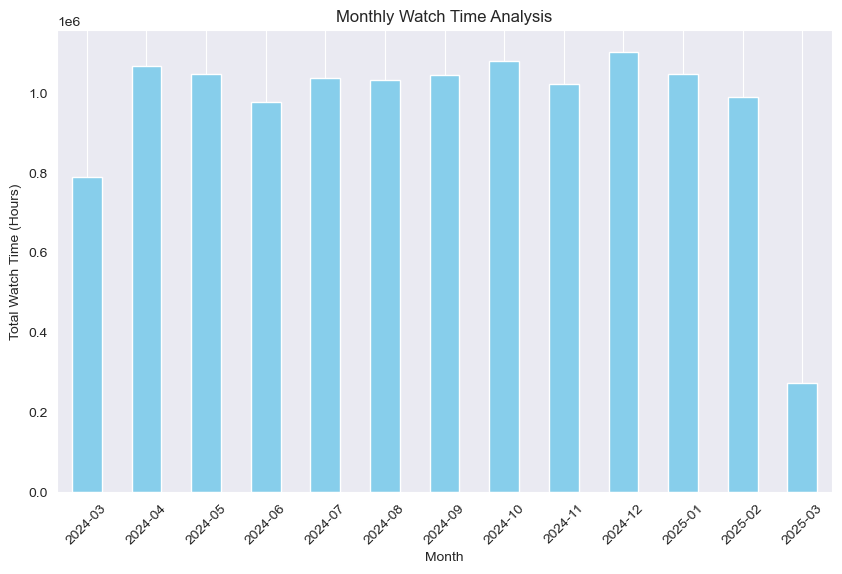

In [109]:
df['Month'] = df['Last_Login'].dt.to_period('M')
monthly_watch_time = df.groupby('Month')['Watch_Time_Hours'].sum()

plt.figure(figsize=(10, 6))
monthly_watch_time.plot(kind='bar', color='skyblue')
plt.title('Monthly Watch Time Analysis')
plt.xlabel('Month')
plt.ylabel('Total Watch Time (Hours)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


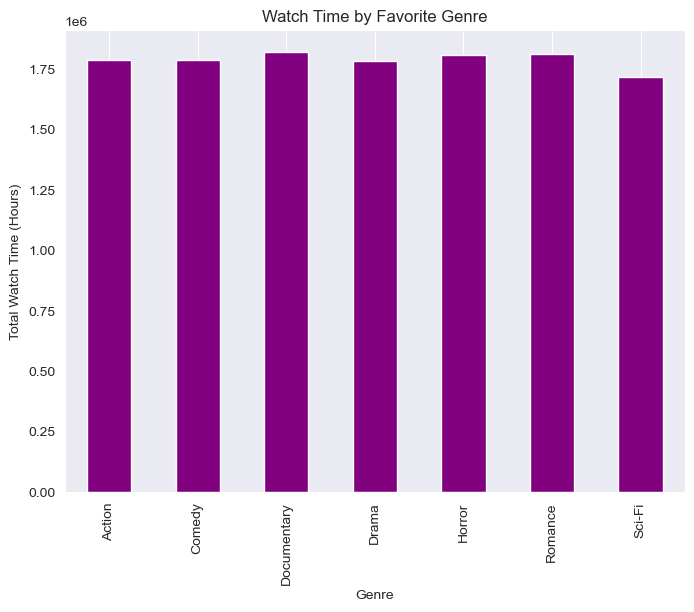

In [111]:
genre_watch_time = df.groupby('Favorite_Genre')['Watch_Time_Hours'].sum()

plt.figure(figsize=(8, 6))
genre_watch_time.plot(kind='bar', color='purple')
plt.title('Watch Time by Favorite Genre')
plt.xlabel('Genre')
plt.ylabel('Total Watch Time (Hours)')
plt.grid(axis='y')
plt.show()


/var/folders/bd/7d25rklx17qc4ffk7nlpkfsm0000gn/T/ipykernel_4930/891340356.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_watch_time = df.groupby('Age_Group')['Watch_Time_Hours'].sum()


Text(0.5, 0, 'Age Group')

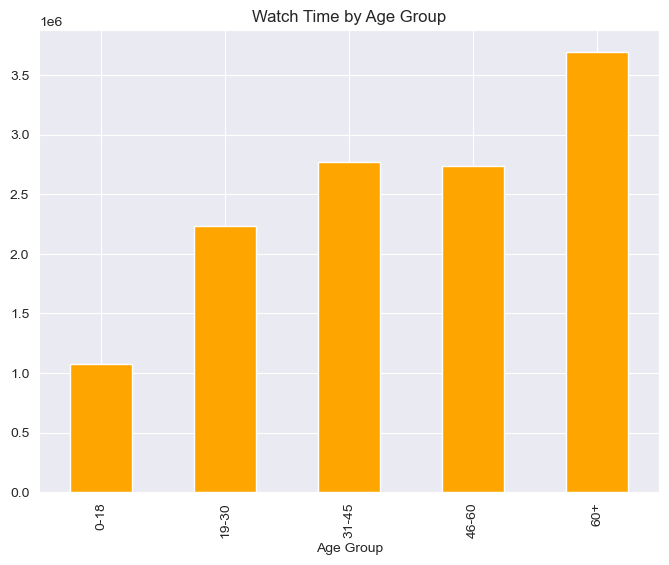

In [113]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_group_watch_time = df.groupby('Age_Group')['Watch_Time_Hours'].sum()

plt.figure(figsize=(8, 6))
age_group_watch_time.plot(kind='bar', color='orange')
plt.title('Watch Time by Age Group')
plt.xlabel('Age Group')


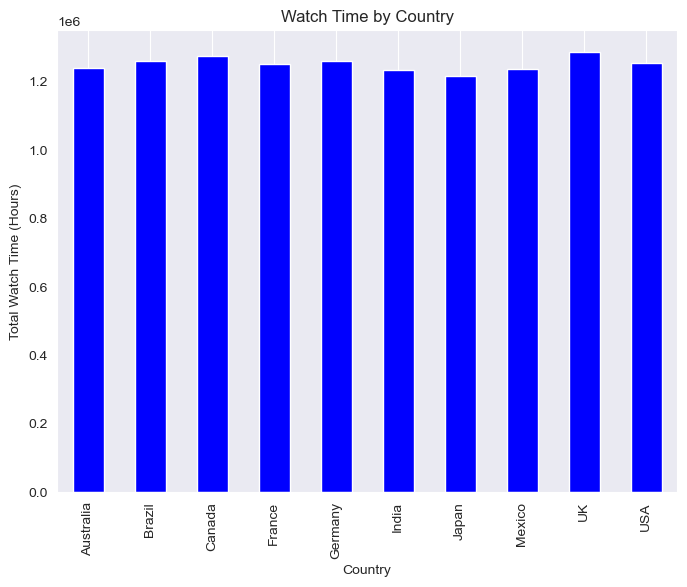

In [115]:
country_watch_time = df.groupby('Country')['Watch_Time_Hours'].sum()

plt.figure(figsize=(8, 6))
country_watch_time.plot(kind='bar', color='blue')
plt.title('Watch Time by Country')
plt.xlabel('Country')
plt.ylabel('Total Watch Time (Hours)')
plt.grid(axis='y')
plt.show()


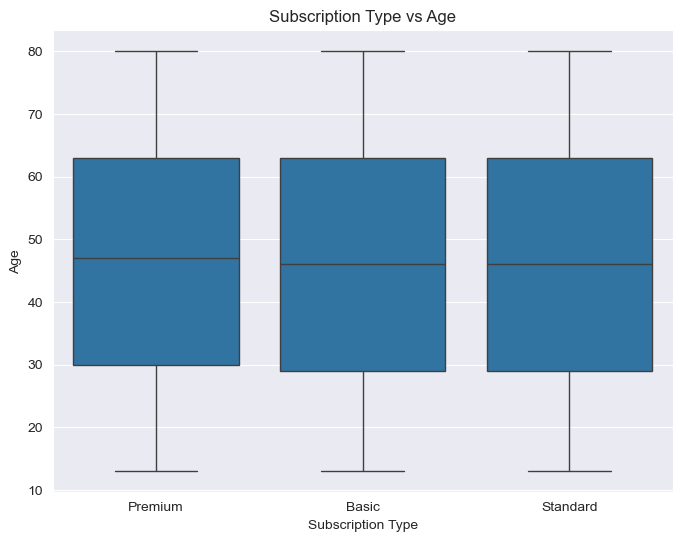

In [119]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Subscription_Type', y='Age', data=df)
plt.title('Subscription Type vs Age')
plt.xlabel('Subscription Type')
plt.ylabel('Age')
plt.show()


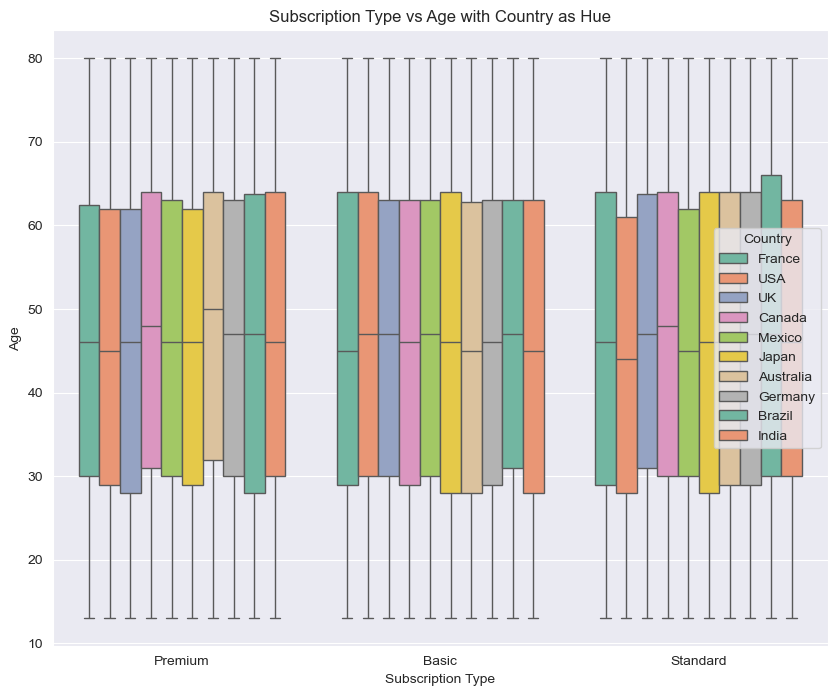

In [129]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Subscription_Type', y='Age', hue='Country', data=df, palette='Set2')
plt.title('Subscription Type vs Age with Country as Hue')
plt.xlabel('Subscription Type')
plt.ylabel('Age')
plt.legend(title='Country')
plt.show()


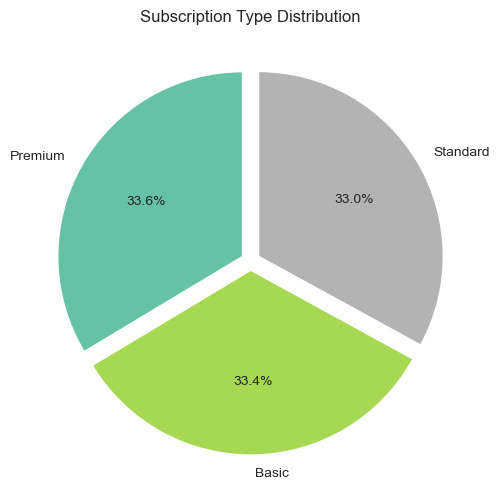

In [131]:
plt.figure(figsize=(8, 6))
df['Subscription_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2', explode=[0.05, 0.05, 0.05])
plt.title('Subscription Type Distribution')
plt.ylabel('')  # Hides the y-axis label
plt.show()


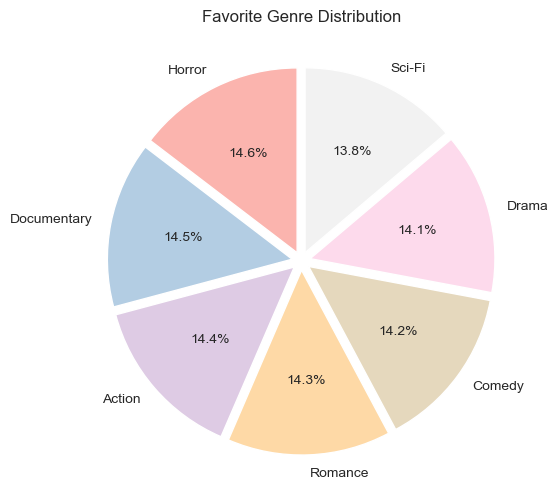

In [133]:
plt.figure(figsize=(8, 6))
df['Favorite_Genre'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1', explode=[0.05]*len(df['Favorite_Genre'].unique()))
plt.title('Favorite Genre Distribution')
plt.ylabel('')
plt.show()


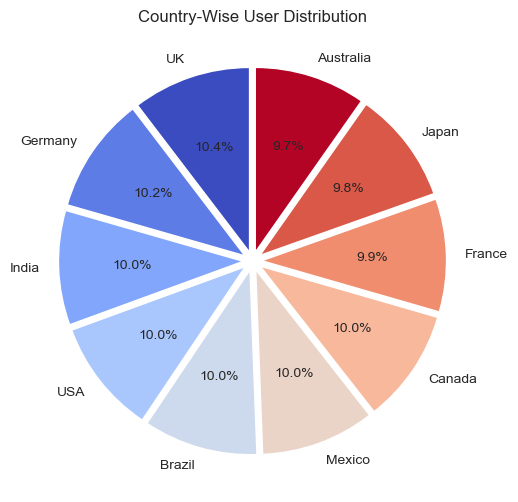

In [135]:
plt.figure(figsize=(8, 6))
df['Country'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', explode=[0.05]*len(df['Country'].unique()))
plt.title('Country-Wise User Distribution')
plt.ylabel('')
plt.show()


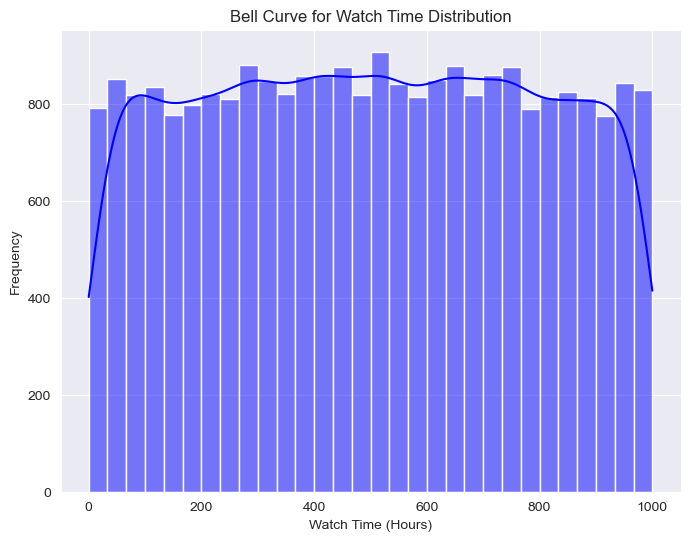

In [137]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Watch_Time_Hours'], bins=30, kde=True, color='blue')
plt.title('Bell Curve for Watch Time Distribution')
plt.xlabel('Watch Time (Hours)')
plt.ylabel('Frequency')
plt.show()


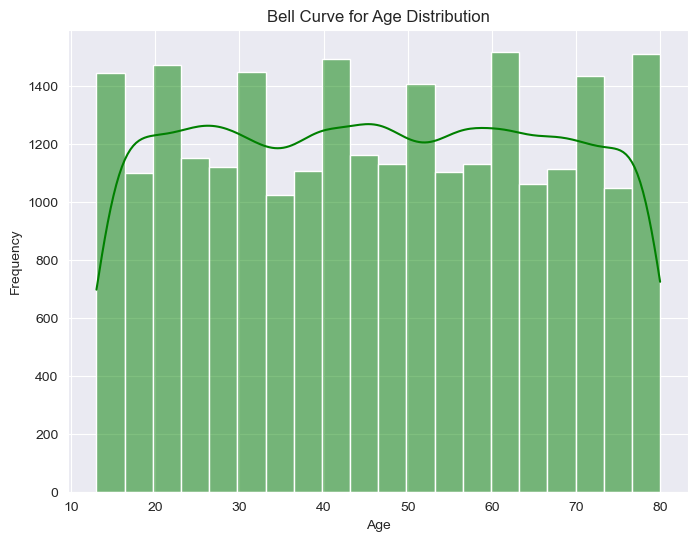

In [139]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='green')
plt.title('Bell Curve for Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


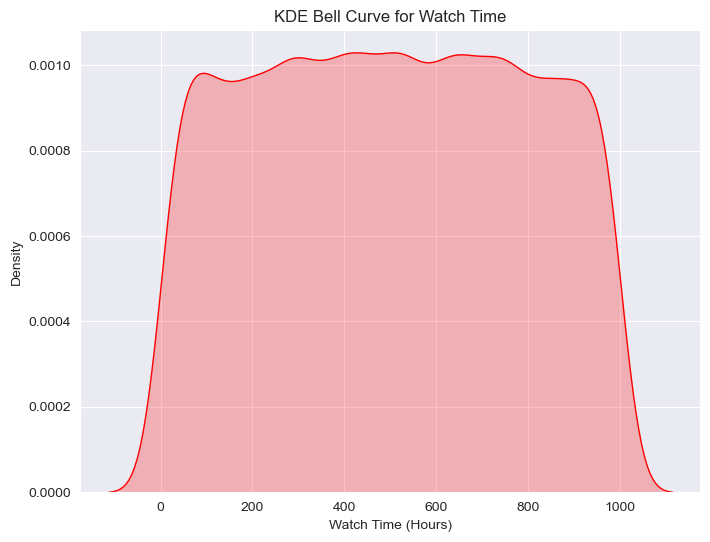

In [141]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Watch_Time_Hours'], color='red', fill=True)
plt.title('KDE Bell Curve for Watch Time')
plt.xlabel('Watch Time (Hours)')
plt.ylabel('Density')
plt.show()
